## Resume Classification
### Business objective:
* **The document classification solution should significantly reduce the manual human effort in the HRM. It should achieve a higher level of accuracy and automation with minimal human intervention**

## 1. Import Library

In [2]:
pip install textract

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.9/106.9 kB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 9.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.0/69.0 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 24.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 471.6/471.6 kB 23.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.8/32.8 MB 14.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.3/103.3 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 49.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.0/74.0 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.6/114.6 kB 11.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.5/128.5 kB 13.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━

In [1]:
import os
import re
import nltk
import spacy
import string
import textract
import pandas as pd
import seaborn as sns
from matplotlib import pylab
from matplotlib import pyplot as plt

from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from wordcloud import WordCloud, STOPWORDS
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer

import warnings
warnings.filterwarnings('ignore')

In [4]:
import zipfile

# Specify the path to the zip file
zip_file_path = 'Resumes.zip'

# Open the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    # Get a list of all contents in the zip file
    contents = zip_ref.namelist()

# Print the list of contents
print("Contents of the zip file:")
for item in contents:
    print(item)


Contents of the zip file:
Resumes/React Developer_Haripriya.docx
Resumes/React Developer_Naveen sadhu.docx
Resumes/Reactjs Developer_MD Khizaruddin Rauf _Musquare Technologies.docx
Resumes/Internship_Susovan Bag_Musquare Technologies.docx
Resumes/Internship_Ravali_Musquare Technologies (1).docx
Resumes/React Developer_Pragnya.docx
Resumes/Reactjs Developer_M Lokesh.docx
Resumes/Reactjs Developer_Prabakaran_Musquare Technologies.pdf
Resumes/Reactjs Developer_Pranish Sonone_Musquare Technologies.docx
Resumes/React Developer_Sarala Madasu-converted.docx
Resumes/React Developer_Kamalakar Reddy.docx
Resumes/React JS Developer_Venkatalakshmi (1)-converted.docx
Resumes/React JS Developer_AnjaniPriyadarshini.doc
Resumes/React Developer_Vinay Reddy.doc
Resumes/Reactjs Developer_Ranga Gaganam_Musquare Technologies.docx
Resumes/Reactjs Developer_M Lokesh Babu_Musquare Technologies.docx
Resumes/React Developer_Thirupathiamma.docx
Resumes/React JS Developer_KotaniDurgaprasad[3_1] (1)-converted.docx

In [5]:
from google.colab import files
uploaded = files.upload()

Saving Resumes-20220812T140008Z-001 (1) (2).zip to Resumes-20220812T140008Z-001 (1) (2).zip


In [6]:
import zipfile

with zipfile.ZipFile('Resumes.zip', 'r') as zip_ref:
    zip_ref.extractall('destination_folder')

In [13]:
os.listdir('destination_folder/')

['Resumes']

## 2. Exctract the Text from Dataset

In [16]:
file_path1 = []
category1  = []
directory1 = 'destination_folder/Resumes/Peoplesoft resumes/'
for i in os.listdir(directory1):
    if i.endswith('.docx'):
        os.path.join(directory1, i)
        file_path1.append((textract.process(os.path.join(directory1, i))).decode('utf-8'))
        category1.append('PeopleSoft')

In [27]:
data1 = pd.DataFrame(data = file_path1 , columns = ['Raw_Details'])
data1['Category1'] = category1
data1

,Raw_Details,Category1
0,Tanna Sujatha \n\n\n\n\n\n\n\nOBJECTIVE\n\nSee...,PeopleSoft
1,Murali\t\t \n\n\t\n\n\n\n\n\n\n\n\n\n\n\...,PeopleSoft
2,Classification: Internal\n\nClassification: In...,PeopleSoft
3,PeopleSoft Administration\n\n \n\nVivekanand S...,PeopleSoft
4,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,PeopleSoft
5,Priyabrata Hota\n\n\n\n\n\nCAREER OBJECTIVE\t\...,PeopleSoft
6,C O N T A C T :\n\n\n\nAddress: Manyata Tech P...,PeopleSoft
7,"SIRAZUDDIN M\n\n\tBangalore, INDIA\t\n\n\n\n\n...",PeopleSoft
8,Hari Narayana \t\t \n\n\t\n\n\n\n...,PeopleSoft
9,PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCaree...,PeopleSoft


In [18]:
file_path2 = []
category2  = []
directory2 = 'destination_folder/Resumes'
for i in os.listdir(directory2):
    if i.endswith('.docx'):
        os.path.join(directory2, i)
        file_path2.append((textract.process(os.path.join(directory2, i))).decode('utf-8'))
        category2.append('React JS Developer')

In [19]:
data2 = pd.DataFrame(data = file_path2 , columns = ['Raw_Details'])
data2['Category2'] = category2
data2

,Raw_Details,Category2
0,Thirupathamma Balla\n\n\n\nSUMMARY:\n\n\n\n2.8...,React JS Developer
1,Naveen Sadhu\n\n\n\n\n\nTitle: software develo...,React JS Developer
2,Ranga Gaganam \n\n\n\n \n\nProfessional\n\n \...,React JS Developer
3,Kanumuru Deepak Reddy\n\n\n\n\t\n\n\n\nCAREER ...,React JS Developer
4,MAREEDU LOKESH BABU\n\nPROFESSIONAL OVERVIEW\n...,React JS Developer
5,Ui-Developer/ React JS Developer \n\nNAME: KRI...,React JS Developer
6,SHAIK ABDUL SHARUK \n\n2 years’ Experience i...,React JS Developer
7,KAMALAKAR REDDY. A \n\nLinked In: https://www....,React JS Developer
8,Venkatalakshmi Pedireddy\n\nSoftware Developer...,React JS Developer
9,Kotani Durga Prasad\n\n\n\n\n\nObjective:\n\n\...,React JS Developer


In [20]:
file_path3 = []
category3  = []
directory3 = 'destination_folder/Resumes/SQL Developer Lightning insight/'
for i in os.listdir(directory3):
    if i.endswith('.docx'):
        os.path.join(directory3, i)
        file_path3.append((textract.process(os.path.join(directory3, i))).decode('utf-8'))
        category3.append('SQL Developer')

In [21]:
data3 = pd.DataFrame(data = file_path3 , columns = ['Raw_Details'])
data3['Category3'] = category3
data3

,Raw_Details,Category3
0,KAMBALLA PRADEEP ...,SQL Developer
1,Resume\n\nName : Neeraj Mishra\n\n\n\nExp...,SQL Developer
2,Name: Ramesh\n\n\t\n\n\tCareer Objective: \n\n...,SQL Developer
3,SQL AND MSBI DEVELOPER\n\nSQL AND MSBI DEVELOP...,SQL Developer
4,BUDDHA VAMSI ...,SQL Developer
5,resume\n\n\n\n\n\n\t\t\t\t\t\t\t\t\t\t\t\tRama...,SQL Developer
6,RAJU PAVANA KUMARI\n\n\n\n\t\n\n\tProfessional...,SQL Developer
7,SQL SERVER DEVELOPER\n\n\n\n\n\nP. Syam Kumar ...,SQL Developer
8,ANIL KUMAR MADDUKURI \t\t\n\nSQL & MSBI Devel...,SQL Developer
9,SQL DEVELOPER\n\nName: - Bandi prem sai\n\n\...,SQL Developer


In [23]:
file_path4 = []
category4  = []
directory4 = 'destination_folder/Resumes/workday resumes/'
for i in os.listdir(directory4):
    if i.endswith('.docx'):
        os.path.join(directory4, i)
        file_path4.append((textract.process(os.path.join(directory4, i))).decode('utf-8'))
        category4.append('Workday')

In [24]:
data4 = pd.DataFrame(data = file_path4 , columns = ['Raw_Details'])
data4['Category4'] = category4
data4

,Raw_Details,Category4
0,Srikanth (WORKDAY hCM Consultant)\t ...,Workday
1,VENKATA SAIKRISHNA\n\n Workday Consultant\n\n\...,Workday
2,WORKDAY | HCM | FCM\n\nName \t\t: Kumar S.S\n\...,Workday
3,Chinna Subbarayudu M\n\nDOB: 06th March 1994\n...,Workday
4,Name : Gopi Krishna Reddy\n\n\t\t\t\t ...,Workday
5,Vinay kumar .v\nWorkday Functional Consultant\...,Workday
6,Mooraboyina Guravaiah\n\nWorkday Integration S...,Workday
7,Workday HCM Techno functional Consultant ...,Workday
8,Ramesh A\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t...,Workday
9,JYOTI VERMA\t\t\t\t\t\n\n\n\nPROFESSIONAL SUMM...,Workday


## 3. Create a DataFrame

In [28]:
resume_data = pd.concat([data1, data2, data3, data4], ignore_index = True)
resume_data

,Raw_Details,Category1,Category2,Category3,Category4
0,Tanna Sujatha \n\n\n\n\n\n\n\nOBJECTIVE\n\nSee...,PeopleSoft,NaN,NaN,NaN
1,Murali\t\t \n\n\t\n\n\n\n\n\n\n\n\n\n\n\...,PeopleSoft,NaN,NaN,NaN
2,Classification: Internal\n\nClassification: In...,PeopleSoft,NaN,NaN,NaN
3,PeopleSoft Administration\n\n \n\nVivekanand S...,PeopleSoft,NaN,NaN,NaN
4,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,PeopleSoft,NaN,NaN,NaN
5,Priyabrata Hota\n\n\n\n\n\nCAREER OBJECTIVE\t\...,PeopleSoft,NaN,NaN,NaN
6,C O N T A C T :\n\n\n\nAddress: Manyata Tech P...,PeopleSoft,NaN,NaN,NaN
7,"SIRAZUDDIN M\n\n\tBangalore, INDIA\t\n\n\n\n\n...",PeopleSoft,NaN,NaN,NaN
8,Hari Narayana \t\t \n\n\t\n\n\n\n...,PeopleSoft,NaN,NaN,NaN
9,PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCaree...,PeopleSoft,NaN,NaN,NaN


In [29]:
resume_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Raw_Details  52 non-null     object
 1   Category1    10 non-null     object
 2   Category2    20 non-null     object
 3   Category3    11 non-null     object
 4   Category4    11 non-null     object
dtypes: object(5)
memory usage: 2.2+ KB


### 3.1 Merge all Unnecessary column in One Column

In [30]:
resume_data['Category'] = category1 + category2 + category3 + category4
resume_data

,Raw_Details,Category1,Category2,Category3,Category4,Category
0,Tanna Sujatha \n\n\n\n\n\n\n\nOBJECTIVE\n\nSee...,PeopleSoft,NaN,NaN,NaN,PeopleSoft
1,Murali\t\t \n\n\t\n\n\n\n\n\n\n\n\n\n\n\...,PeopleSoft,NaN,NaN,NaN,PeopleSoft
2,Classification: Internal\n\nClassification: In...,PeopleSoft,NaN,NaN,NaN,PeopleSoft
3,PeopleSoft Administration\n\n \n\nVivekanand S...,PeopleSoft,NaN,NaN,NaN,PeopleSoft
4,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,PeopleSoft,NaN,NaN,NaN,PeopleSoft
5,Priyabrata Hota\n\n\n\n\n\nCAREER OBJECTIVE\t\...,PeopleSoft,NaN,NaN,NaN,PeopleSoft
6,C O N T A C T :\n\n\n\nAddress: Manyata Tech P...,PeopleSoft,NaN,NaN,NaN,PeopleSoft
7,"SIRAZUDDIN M\n\n\tBangalore, INDIA\t\n\n\n\n\n...",PeopleSoft,NaN,NaN,NaN,PeopleSoft
8,Hari Narayana \t\t \n\n\t\n\n\n\n...,PeopleSoft,NaN,NaN,NaN,PeopleSoft
9,PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCaree...,PeopleSoft,NaN,NaN,NaN,PeopleSoft


In [31]:
resume_data.drop(['Category1', 'Category2', 'Category3', 'Category4'], axis = 1, inplace = True)
resume_data = resume_data[["Category", "Raw_Details"]]

### 3.2 Final Dataset

In [32]:
resume_data.head(15)

,Category,Raw_Details
0,PeopleSoft,Tanna Sujatha \n\n\n\n\n\n\n\nOBJECTIVE\n\nSee...
1,PeopleSoft,Murali\t\t \n\n\t\n\n\n\n\n\n\n\n\n\n\n\...
2,PeopleSoft,Classification: Internal\n\nClassification: In...
3,PeopleSoft,PeopleSoft Administration\n\n \n\nVivekanand S...
4,PeopleSoft,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...
5,PeopleSoft,Priyabrata Hota\n\n\n\n\n\nCAREER OBJECTIVE\t\...
6,PeopleSoft,C O N T A C T :\n\n\n\nAddress: Manyata Tech P...
7,PeopleSoft,"SIRAZUDDIN M\n\n\tBangalore, INDIA\t\n\n\n\n\n..."
8,PeopleSoft,Hari Narayana \t\t \n\n\t\n\n\n\n...
9,PeopleSoft,PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCaree...


In [33]:
resume_data["Raw_Details"][4]

'Anubhav Kumar Singh\t\t\n\n\n\nCore Competencies:\n\n\n\nScripting\t\t: Shell Scripting\n\n\n\nApplication\t\t: PeopleSoft HCM, FINANCIALS\n\n\n\nOperating System\t: Linux ,Windows\n\n\n\nWeb/App Servers\t: Weblogic, Tuxedo\n\n\n\nRDBMS\t\t: Oracle\n\n\n\nRepository \t\t: Github\n\n\n\nCore Competencies:\n\n\n\nScripting\t\t: Shell Scripting\n\n\n\nApplication\t\t: PeopleSoft HCM, FINANCIALS\n\n\n\nOperating System\t: Linux ,Windows\n\n\n\nWeb/App Servers\t: Weblogic, Tuxedo\n\n\n\nRDBMS\t\t: Oracle\n\n\n\nRepository \t\t: Github\n\n\n\n  To work in a globally competitive environment on \n\n  challenging assignments that shall yield the \n\n  twin benefits of the job satisfaction and a steady-paced \n\n  professional growth.\n\n\n\n\n\n\n\n\n\n\n\n\n\n \n\n\n\n\n\n \n\n\n\n\n\n Professional Experience\n\n\n\n 06/2019 - Current\tHCL\t\t\t\t\t\t\t\t\t\t\n\n\t\t\tCurrent Role: System Admin Offshore\n\n\t\t\tSkills : Shell Scripting, Linux , PeopleSoft Administration , Github\n\n\n\nManag

### 3.3 Save new CSV File

In [34]:
resume_data.to_csv('Raw_Resume.csv', index=False)

## 4. Data Understanding

In [35]:
resume_data = pd.read_csv("Raw_Resume.csv")
resume_data

,Category,Raw_Details
0,PeopleSoft,Tanna Sujatha \n\n\n\n\n\n\n\nOBJECTIVE\n\nSee...
1,PeopleSoft,Murali\t\t \n\n\t\n\n\n\n\n\n\n\n\n\n\n\...
2,PeopleSoft,Classification: Internal\n\nClassification: In...
3,PeopleSoft,PeopleSoft Administration\n\n \n\nVivekanand S...
4,PeopleSoft,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...
5,PeopleSoft,Priyabrata Hota\n\n\n\n\n\nCAREER OBJECTIVE\t\...
6,PeopleSoft,C O N T A C T :\n\n\n\nAddress: Manyata Tech P...
7,PeopleSoft,"SIRAZUDDIN M\n\n\tBangalore, INDIA\t\n\n\n\n\n..."
8,PeopleSoft,Hari Narayana \t\t \n\n\t\n\n\n\n...
9,PeopleSoft,PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCaree...


In [36]:
resume_data[resume_data.Category == 'Workday']

,Category,Raw_Details
41,Workday,Srikanth (WORKDAY hCM Consultant)\t ...
42,Workday,VENKATA SAIKRISHNA\n\n Workday Consultant\n\n\...
43,Workday,WORKDAY | HCM | FCM\n\nName \t\t: Kumar S.S\n\...
44,Workday,Chinna Subbarayudu M\n\nDOB: 06th March 1994\n...
45,Workday,Name : Gopi Krishna Reddy\n\n\t\t\t\t ...
46,Workday,Vinay kumar .v\nWorkday Functional Consultant\...
47,Workday,Mooraboyina Guravaiah\n\nWorkday Integration S...
48,Workday,Workday HCM Techno functional Consultant ...
49,Workday,Ramesh A\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t...
50,Workday,JYOTI VERMA\t\t\t\t\t\n\n\n\nPROFESSIONAL SUMM...


In [37]:
resume_data.isnull().sum()

Category       0
Raw_Details    0
dtype: int64

### 4.1 Number of Words in each Resume

In [38]:
resume_data['Word_Count'] = resume_data['Raw_Details'].apply(lambda x: len(str(x).split(" ")))
resume_data[['Raw_Details','Word_Count']].head()

,Raw_Details,Word_Count
0,Tanna Sujatha \n\n\n\n\n\n\n\nOBJECTIVE\n\nSee...,363
1,Murali\t\t \n\n\t\n\n\n\n\n\n\n\n\n\n\n\...,433
2,Classification: Internal\n\nClassification: In...,558
3,PeopleSoft Administration\n\n \n\nVivekanand S...,2585
4,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,1023


### 4.2 Number of Characters

In [39]:
resume_data['Char_Count'] = resume_data['Raw_Details'].str.len() ## this also includes spaces
resume_data[['Raw_Details','Char_Count']].head()

,Raw_Details,Char_Count
0,Tanna Sujatha \n\n\n\n\n\n\n\nOBJECTIVE\n\nSee...,2852
1,Murali\t\t \n\n\t\n\n\n\n\n\n\n\n\n\n\n\...,3669
2,Classification: Internal\n\nClassification: In...,4917
3,PeopleSoft Administration\n\n \n\nVivekanand S...,16112
4,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,8010


### 4.3 Number of Stopwords

In [42]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [43]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
resume_data['Stopwords'] = resume_data['Raw_Details'].apply(lambda x: len([x for x in x.split() if x in stop]))
resume_data[['Raw_Details','Stopwords']].head()

,Raw_Details,Stopwords
0,Tanna Sujatha \n\n\n\n\n\n\n\nOBJECTIVE\n\nSee...,98
1,Murali\t\t \n\n\t\n\n\n\n\n\n\n\n\n\n\n\...,84
2,Classification: Internal\n\nClassification: In...,114
3,PeopleSoft Administration\n\n \n\nVivekanand S...,520
4,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,190


### 4.4 Number of Numerics

In [44]:
resume_data['Numerics'] = resume_data['Raw_Details'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
resume_data[['Raw_Details','Numerics']].head()

,Raw_Details,Numerics
0,Tanna Sujatha \n\n\n\n\n\n\n\nOBJECTIVE\n\nSee...,4
1,Murali\t\t \n\n\t\n\n\n\n\n\n\n\n\n\n\n\...,13
2,Classification: Internal\n\nClassification: In...,7
3,PeopleSoft Administration\n\n \n\nVivekanand S...,17
4,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,4


In [45]:
resume_data

,Category,Raw_Details,Word_Count,Char_Count,Stopwords,Numerics
0,PeopleSoft,Tanna Sujatha \n\n\n\n\n\n\n\nOBJECTIVE\n\nSee...,363,2852,98,4
1,PeopleSoft,Murali\t\t \n\n\t\n\n\n\n\n\n\n\n\n\n\n\...,433,3669,84,13
2,PeopleSoft,Classification: Internal\n\nClassification: In...,558,4917,114,7
3,PeopleSoft,PeopleSoft Administration\n\n \n\nVivekanand S...,2585,16112,520,17
4,PeopleSoft,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,1023,8010,190,4
5,PeopleSoft,Priyabrata Hota\n\n\n\n\n\nCAREER OBJECTIVE\t\...,540,3577,136,3
6,PeopleSoft,C O N T A C T :\n\n\n\nAddress: Manyata Tech P...,356,2150,42,8
7,PeopleSoft,"SIRAZUDDIN M\n\n\tBangalore, INDIA\t\n\n\n\n\n...",455,3800,86,15
8,PeopleSoft,Hari Narayana \t\t \n\n\t\n\n\n\n...,448,3714,88,13
9,PeopleSoft,PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCaree...,918,7943,225,4


## 5. Text Pre-Processing

### 5.1 Using Regular Expression

In [46]:
def preprocess(sentence):
    sentence = str(sentence)
    sentence = sentence.lower()
    sentence = sentence.replace('{html}',"")
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, '', sentence)
    rem_url = re.sub(r'http\S+', '',cleantext)
    rem_num = re.sub('[0-9]+', '', rem_url)
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(rem_num)
    filtered_words = [w for w in tokens if len(w) > 2 if not w in stopwords.words('english')]

    return " ".join(filtered_words)

In [47]:
resume_data = pd.read_csv('Raw_Resume.csv')
resume_data['Resume_Details'] = resume_data.Raw_Details.apply(lambda x: preprocess(x))

### 5.2 Clean Text from Resume

In [48]:
resume_data

,Category,Raw_Details,Resume_Details
0,PeopleSoft,Tanna Sujatha \n\n\n\n\n\n\n\nOBJECTIVE\n\nSee...,tanna sujatha objective seeking challenging ro...
1,PeopleSoft,Murali\t\t \n\n\t\n\n\n\n\n\n\n\n\n\n\n\...,murali professional summary years experience p...
2,PeopleSoft,Classification: Internal\n\nClassification: In...,classification internal classification interna...
3,PeopleSoft,PeopleSoft Administration\n\n \n\nVivekanand S...,peoplesoft administration vivekanand sayana ca...
4,PeopleSoft,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,anubhav kumar singh core competencies scriptin...
5,PeopleSoft,Priyabrata Hota\n\n\n\n\n\nCAREER OBJECTIVE\t\...,priyabrata hota career objective pursuing peop...
6,PeopleSoft,C O N T A C T :\n\n\n\nAddress: Manyata Tech P...,address manyata tech park nagavara bangalore l...
7,PeopleSoft,"SIRAZUDDIN M\n\n\tBangalore, INDIA\t\n\n\n\n\n...",sirazuddin bangalore india sirazuddin bangalor...
8,PeopleSoft,Hari Narayana \t\t \n\n\t\n\n\n\n...,hari narayana professional summary years exper...
9,PeopleSoft,PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCaree...,peoplesoft admin varkala vikas career objectiv...


### 5.3 Save the Clean Data in new CSV File

In [49]:
resume_data.drop(['Raw_Details'], axis = 1, inplace = True)
resume_data

,Category,Resume_Details
0,PeopleSoft,tanna sujatha objective seeking challenging ro...
1,PeopleSoft,murali professional summary years experience p...
2,PeopleSoft,classification internal classification interna...
3,PeopleSoft,peoplesoft administration vivekanand sayana ca...
4,PeopleSoft,anubhav kumar singh core competencies scriptin...
5,PeopleSoft,priyabrata hota career objective pursuing peop...
6,PeopleSoft,address manyata tech park nagavara bangalore l...
7,PeopleSoft,sirazuddin bangalore india sirazuddin bangalor...
8,PeopleSoft,hari narayana professional summary years exper...
9,PeopleSoft,peoplesoft admin varkala vikas career objectiv...


In [50]:
resume_data.to_csv('Cleaned_Resumes.csv', index = False)

In [51]:
resume_data = pd.read_csv('Cleaned_Resumes.csv')
resume_data

,Category,Resume_Details
0,PeopleSoft,tanna sujatha objective seeking challenging ro...
1,PeopleSoft,murali professional summary years experience p...
2,PeopleSoft,classification internal classification interna...
3,PeopleSoft,peoplesoft administration vivekanand sayana ca...
4,PeopleSoft,anubhav kumar singh core competencies scriptin...
5,PeopleSoft,priyabrata hota career objective pursuing peop...
6,PeopleSoft,address manyata tech park nagavara bangalore l...
7,PeopleSoft,sirazuddin bangalore india sirazuddin bangalor...
8,PeopleSoft,hari narayana professional summary years exper...
9,PeopleSoft,peoplesoft admin varkala vikas career objectiv...


In [52]:
resume_data.Resume_Details[5]

'priyabrata hota career objective pursuing peoplesoft executive role overall experience years financial supply chain management processes include modification testing supporting peoplesoft fscm modules professional skill functional purchasing inventory billing sound knowledge account payable sound knowledge peoplesoft security technical query basic knowledge peoplesoft security application designer peoplecode sql tools people tools oracle sql developer database oracle professional summary project module accounts payables client accounts team aptara role developer technologies used crystal reports people tools application designer reporting tools application designer using tool created page contains run control record page add component register component reflected pia pure internet architecture people tools created permission list help people tools permission list separate role selected user access page also created process run crystal tools output visible process monitor reporting too

## 6. Named Entity Recognition (NER)

In [54]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [56]:
oneSetOfStopWords = set(stopwords.words('english')+['``',"''"])
totalWords =[]
Sentences = resume_data['Resume_Details'].values
cleanedSentences = ""
for records in Sentences:
    cleanedText = preprocess(records)
    cleanedSentences += cleanedText
    requiredWords = nltk.word_tokenize(cleanedText)
    for word in requiredWords:
        if word not in oneSetOfStopWords and word not in string.punctuation:
            totalWords.append(word)

wordfreqdist = nltk.FreqDist(totalWords)
mostcommon = wordfreqdist.most_common(50)
print(mostcommon)

[('experience', 330), ('using', 253), ('workday', 232), ('sql', 213), ('application', 208), ('server', 188), ('project', 183), ('data', 180), ('reports', 170), ('peoplesoft', 169), ('business', 165), ('web', 145), ('knowledge', 136), ('react', 132), ('process', 123), ('skills', 118), ('system', 116), ('good', 108), ('client', 105), ('tools', 102), ('working', 101), ('involved', 99), ('database', 99), ('various', 97), ('creating', 97), ('like', 94), ('support', 94), ('developer', 94), ('hcm', 94), ('worked', 93), ('integrations', 92), ('development', 91), ('technical', 89), ('integration', 87), ('servers', 86), ('services', 85), ('report', 83), ('people', 81), ('created', 80), ('html', 80), ('design', 78), ('used', 77), ('role', 74), ('team', 74), ('responsibilities', 72), ('work', 71), ('studio', 71), ('eib', 71), ('testing', 70), ('professional', 69)]


## 7. Parts Of Speech (POS) Tagging

In [60]:
import spacy
!python -m spacy download en_core_web_lg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.7/587.7 MB 643.8 kB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [61]:
nlp = spacy.load('en_core_web_lg')

one_block = cleanedSentences[1300:5200]
doc_block = nlp(one_block)
spacy.displacy.render(doc_block, style= 'ent', jupyter= True)

In [62]:
for token in doc_block[:30]:
    print(token,token.pos_)

  SPACE
client NOUN
datum PROPN
role NOUN
system NOUN
engineer NOUN
duration NOUN
jul PROPN
present PROPN
team NOUN
size NOUN
members NOUN
description NOUN
maintenance NOUN
production NOUN
batch NOUN
support NOUN
project NOUN
maintenance NOUN
involves VERB
working VERB
tickets NOUN
needs VERB
customization NOUN
setup NOUN
enhancements NOUN
creating VERB
modifying VERB
peoplesoft ADJ
objects NOUN


### 7.1 Filtering out only the Nouns and Verbs from the Text to Tokens

In [63]:
one_block = cleanedSentences
doc_block = nlp(one_block)
nouns_verbs = [token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(nouns_verbs[:250])

['seeking', 'role', 'area', 'work', 'organization', 'utilize', 'knowledge', 'provide', 'solutions', 'business', 'summary', 'expertise', 'finance', 'modules', 'purchase', 'account', 'payables', 'experienced', 'working', 'reporting', 'tools', 'query', 'end', 'end', 'knowledge', 'modules', 'handled', 'change', 'requests', 'user', 'synopsis', 'result', 'oriented', 'years', 'experience', 'extended', 'expertise', 'financials', 'area', 'design', 'maintenance', 'production', 'support', 'understanding', 'technology', 'focus', 'delivering', 'business', 'solutions', 'working', 'system', 'engineer', 'decision', 'making', 'skills', 'approach', 'dedicated', 'achieve', 'goals', 'goals', 'ability', 'build', 'territories', 'expand', 'opportunities', 'achievement', 'stated', 'targets', 'education', 'visakhapatnam', 'percentage', 'visakhapatnam', 'percentage', 'school', 'burja', 'percentage', 'software', 'proficiency', 'purchase', 'account', 'payables', 'vendor', 'management', 'databases', 'reporting', '

### 7.2 Counting all the Nouns and Verbs present in the Tokens of words

In [64]:
cv = CountVectorizer()
X = cv.fit_transform(nouns_verbs)
sum_words = X.sum(axis=0)

words_freq = [(word,sum_words[0,idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)

wd_df = pd.DataFrame(words_freq)
wd_df.columns = ['Words','Count']
wd_df[0:15]

,Words,Count
0,experience,298
1,using,244
2,application,207
3,workday,192
4,data,170
5,reports,170
6,project,167
7,business,158
8,web,140
9,react,132


### 7.3 Visualizing the Result of Top 20 Nouns and Verbs most Frequently

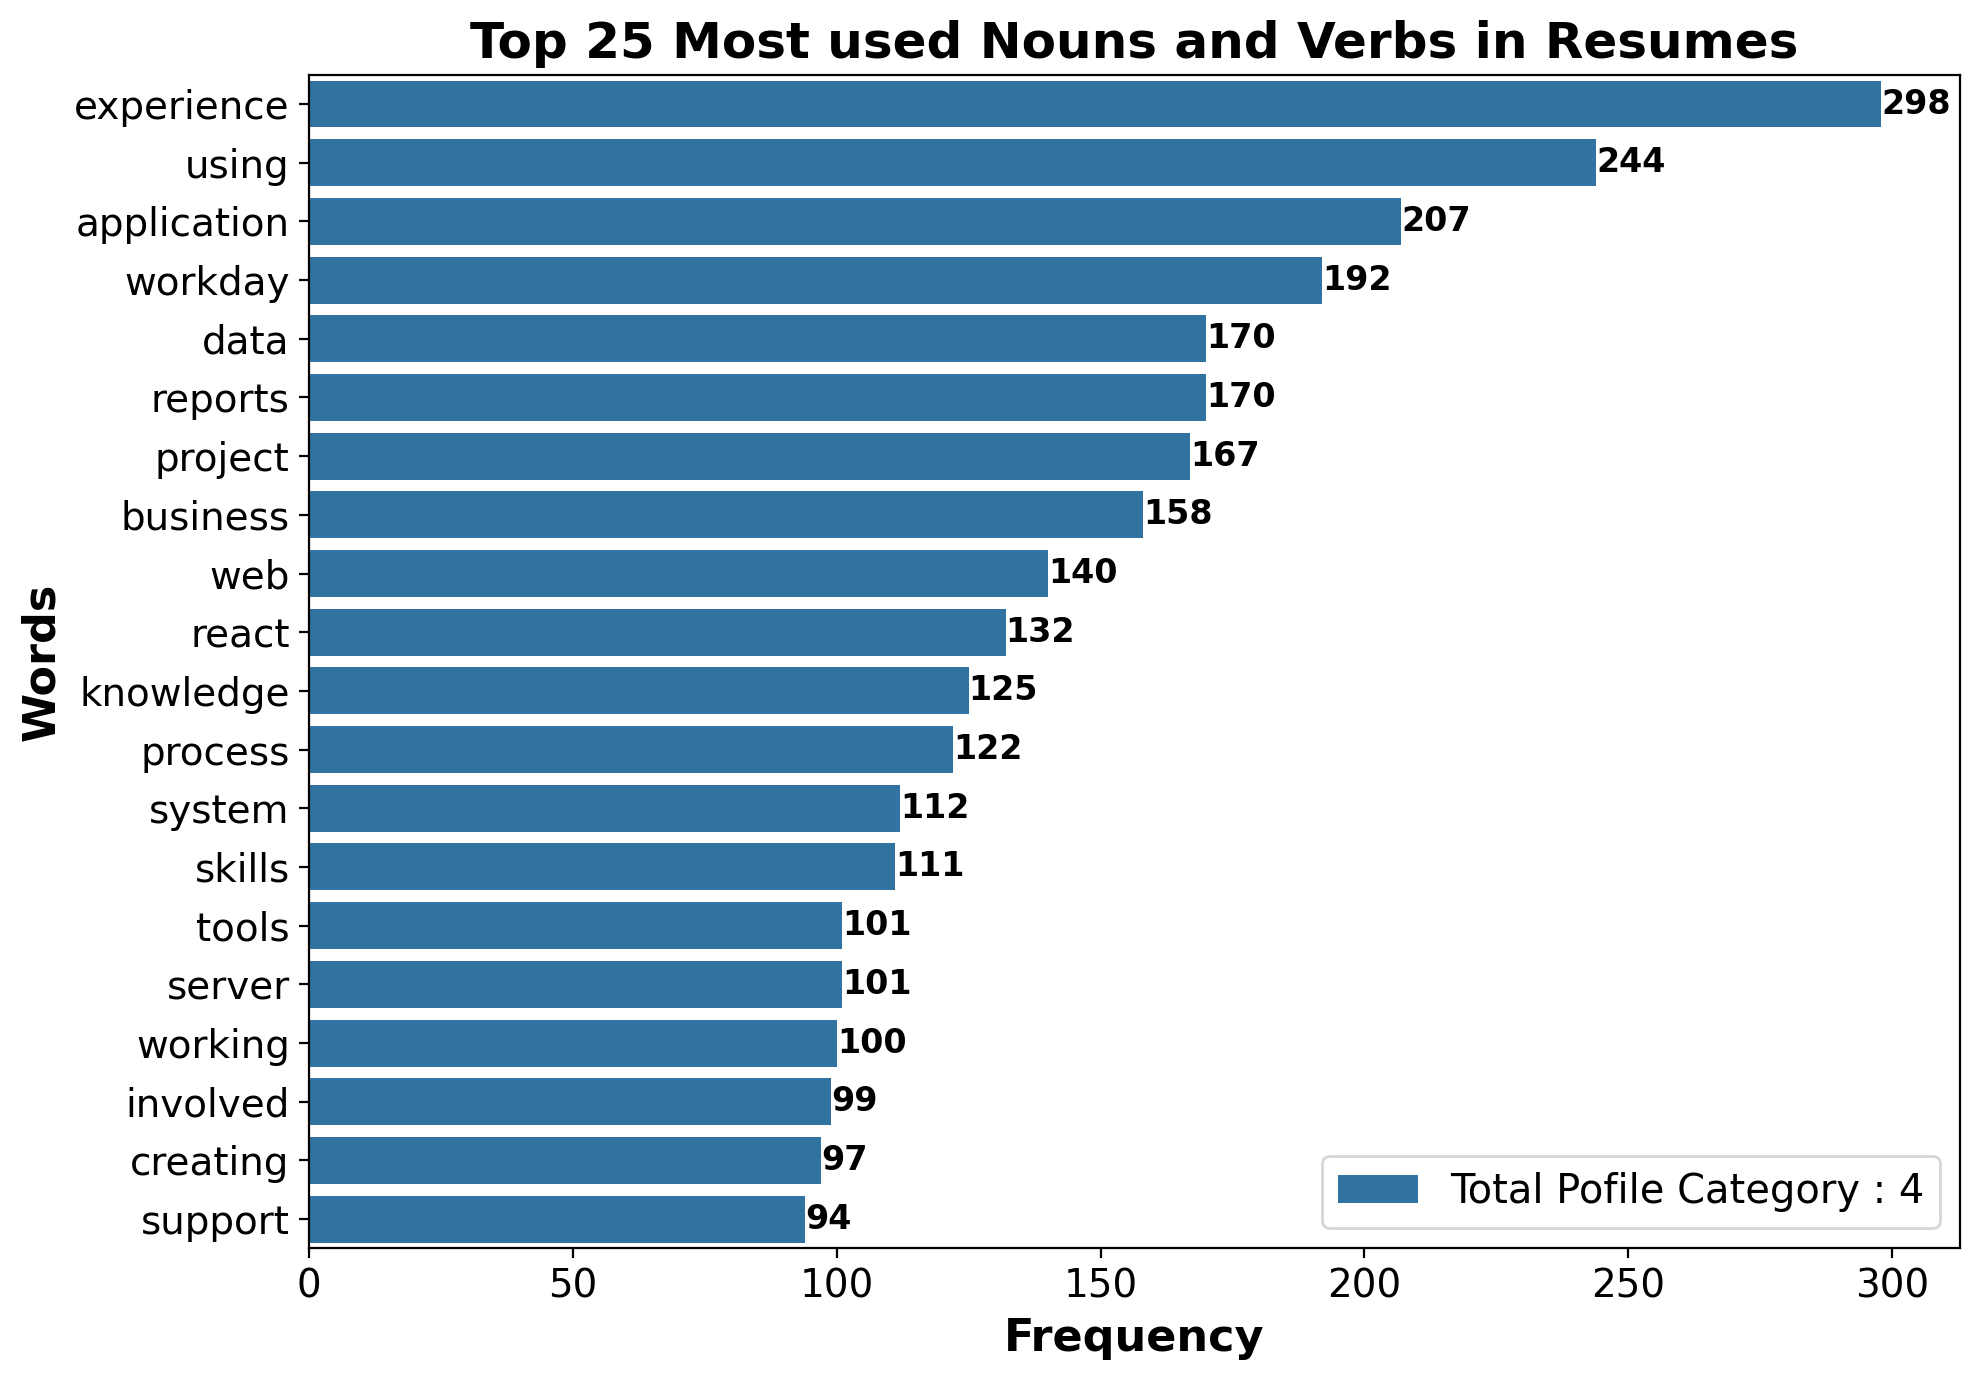

In [66]:
import os

# Specify the directory path
directory_path = 'IMG'

# Create the directory if it doesn't exist
if not os.path.exists(directory_path):
    os.makedirs(directory_path)

fig, axe = plt.subplots(1,1, figsize=(10,7), dpi=200)
ax = sns.barplot(x= wd_df['Count'].head(20), y= wd_df.Words.head(20), data= wd_df, ax = axe,
            label= 'Total Pofile Category : {}'.format(len(resume_data.Category.unique())))

axe.set_xlabel('Frequency', size=16,fontweight= 'bold')
axe.set_ylabel('Words', size=16, fontweight= 'bold')
plt.xticks(rotation = 0)
plt.legend(loc='best', fontsize= 'x-large')
plt.title('Top 25 Most used Nouns and Verbs in Resumes', fontsize= 18, fontweight= 'bold')
rcParams = {'xtick.labelsize':'14','ytick.labelsize':'14','axes.labelsize':'16'}

for i in ax.containers:
    ax.bar_label(i,color = 'black', fontweight = 'bold', fontsize= 12)

pylab.rcParams.update(rcParams)
fig.tight_layout()
plt.show()
fig.savefig('IMG/Top_Nouns_Verbs_Bar.png', dpi=500)

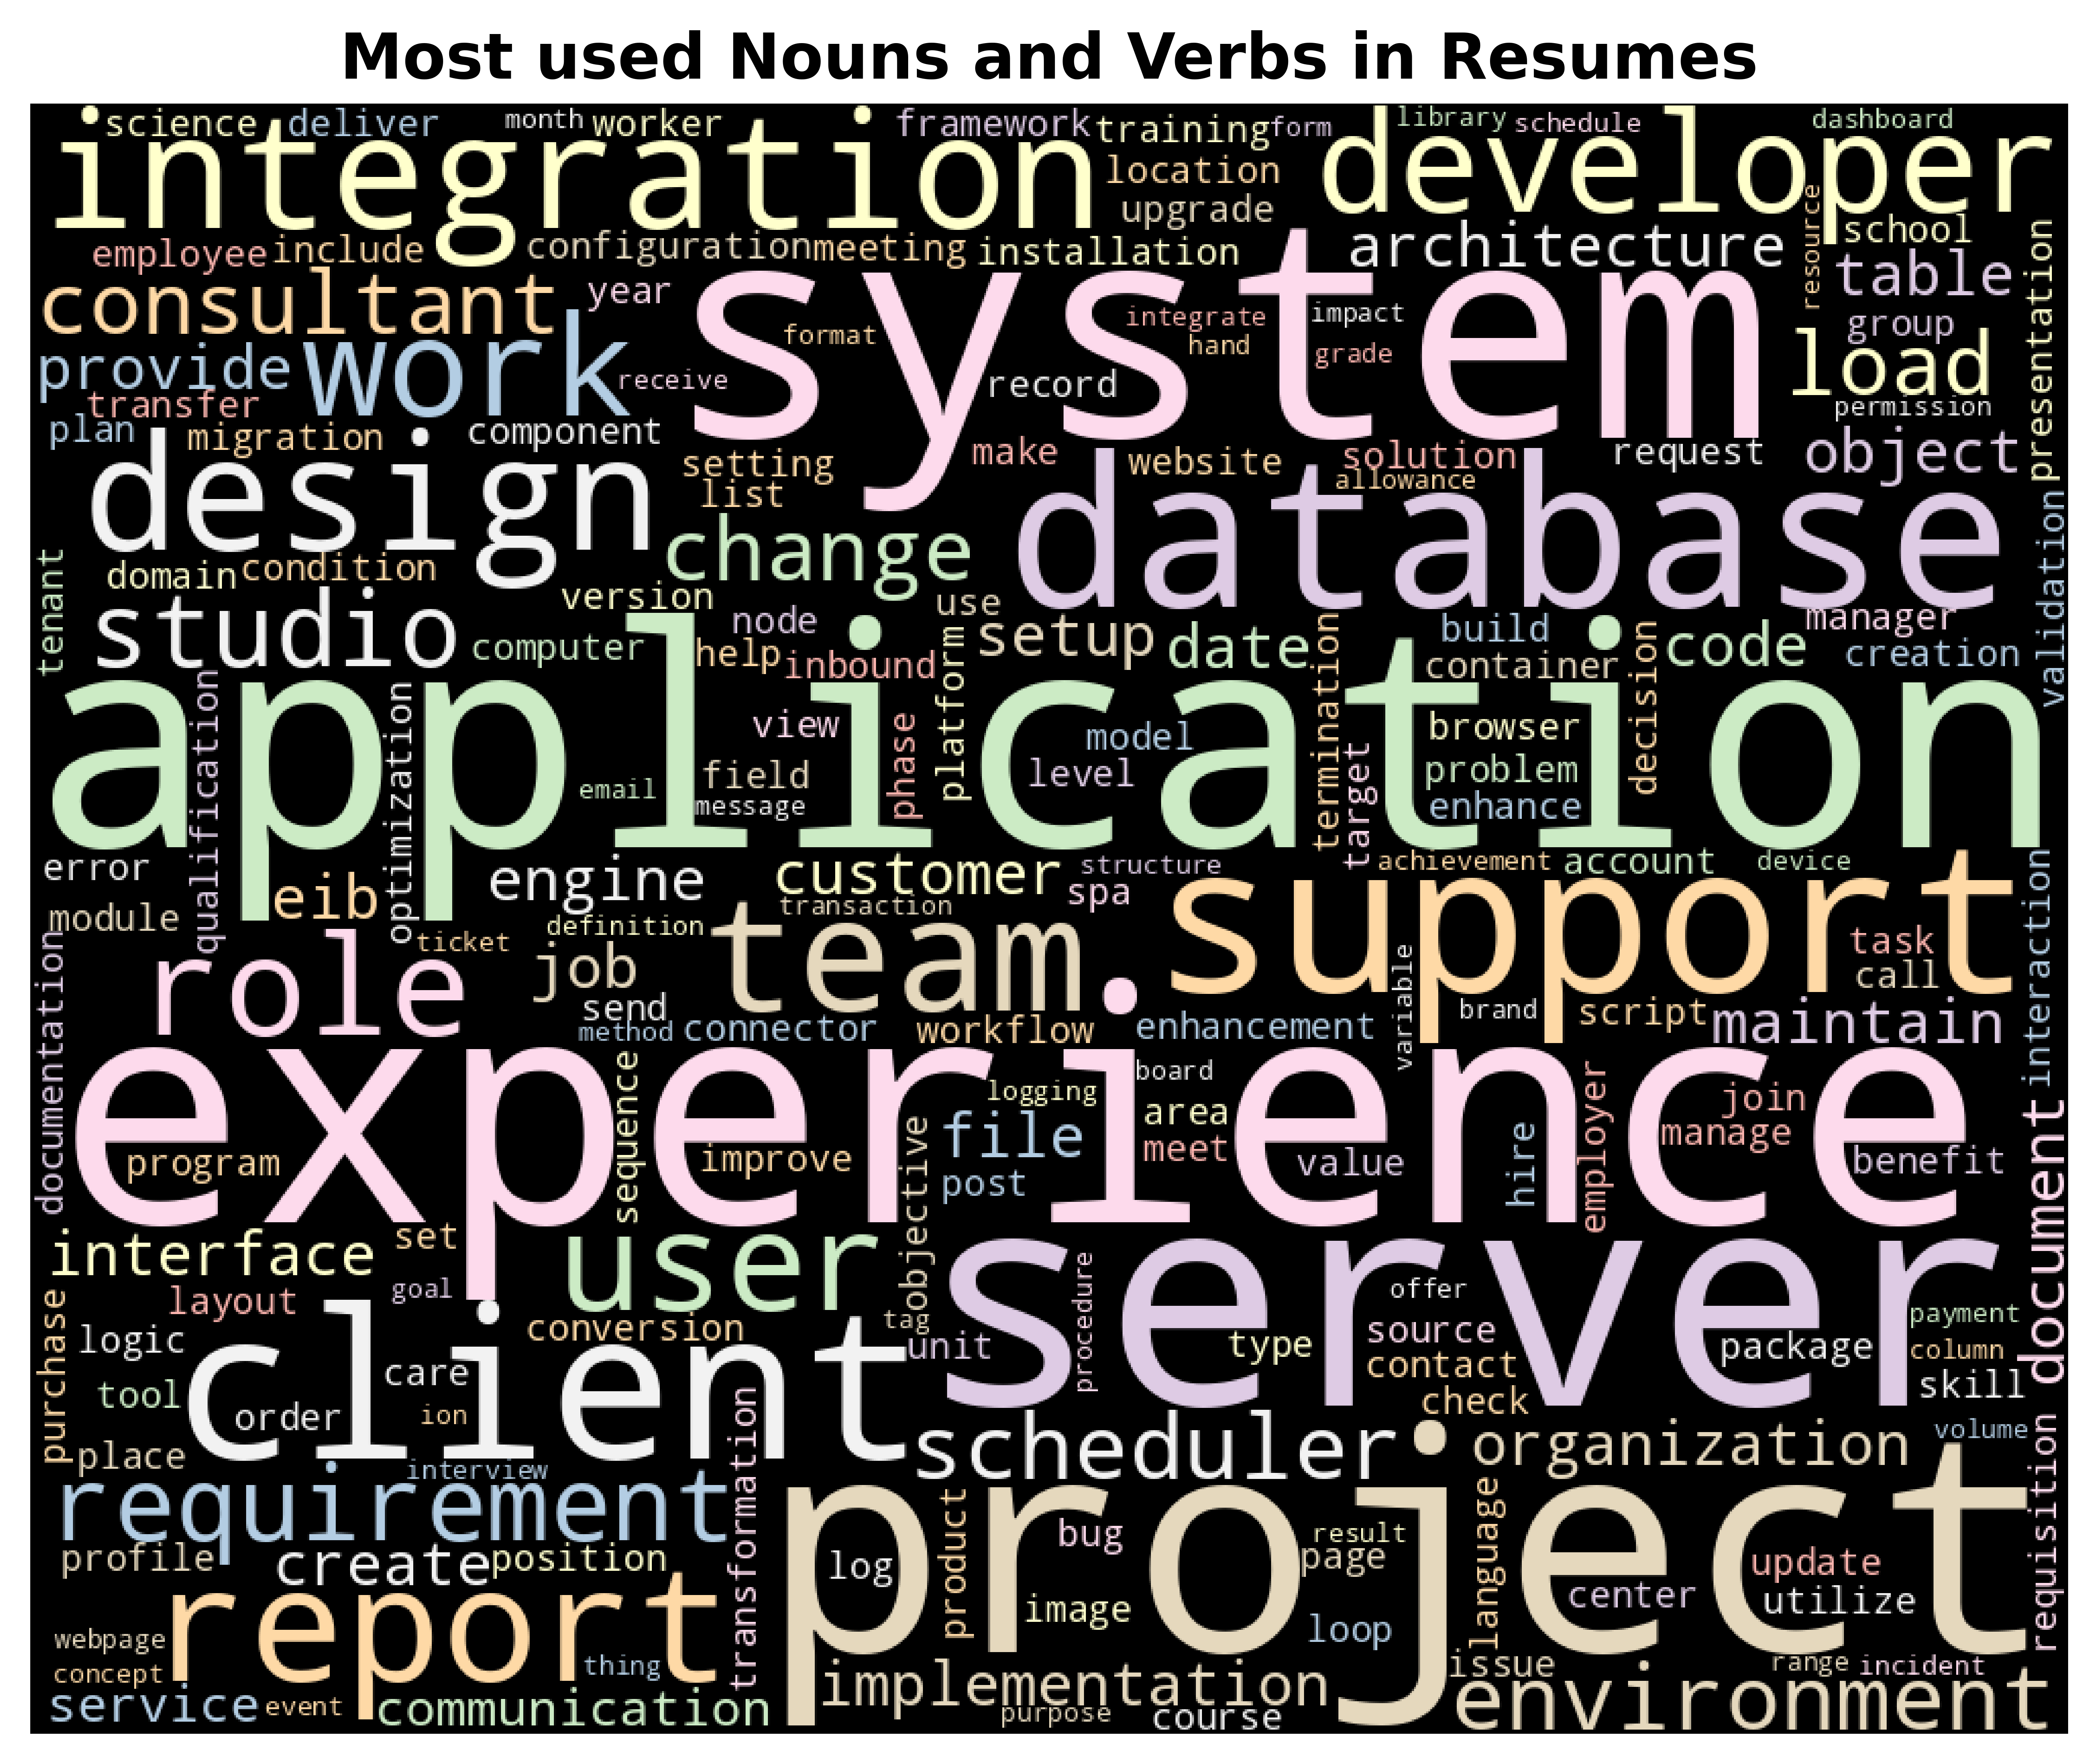

In [67]:
text = " ".join(cat for cat in wd_df.Words) # Creating the text variable

word_cloud = WordCloud(width=1000, height=800, random_state=10, background_color="black",
                       colormap="Pastel1", collocations=False, stopwords=STOPWORDS).generate(text)

plt.figure(figsize=(10,7), dpi=800) # Display the generated Word Cloud
plt.title('Most used Nouns and Verbs in Resumes', fontsize= 15, fontweight= 'bold')
plt.imshow(word_cloud)
plt.axis("off")

word_cloud.to_file('IMG/Word_Clowds_Noun_Verb.png')
plt.show()

# THE END !!!